# Assignment: Deep learning
Build a Keras (deep learning) model where Tensorflow works in backend. This project is to carry outon a hosuing price data set. The objective of this project is to predict of a house price above the median or no.

# 0. Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# 1. Load in data 

In [2]:
houses = pd.read_csv("housepricedata.csv", sep=",")

# 2. Analysis of data

Analys the data set to get a better understanding of the data 

In [10]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
TotalBsmtSF         1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
Fireplaces          1460 non-null int64
GarageArea          1460 non-null int64
AboveMedianPrice    1460 non-null int64
dtypes: int64(11)
memory usage: 125.6 KB
None


In [5]:
# Check if there is null values
print(houses.isnull().sum())

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64


In [7]:
print("Houses data shape",houses.shape)

Houses data shape (1460, 11)


In [8]:
houses.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [9]:
houses.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


# 3.1 Preprocess the data and split the data

In [10]:
x= houses.iloc[:, 0:10]

y = np.ravel(houses.AboveMedianPrice)

# Split the data up in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=45)

## 3.2 Normalize the data

In [11]:
scaler = MinMaxScaler().fit(x_train)

# Scale train and test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 4. Specify model architecture

In [12]:
model = Sequential()

# Input layer with Dense layer, 32 nodes, "relu" activation function
model.add(Dense (32, activation='relu', input_shape=(10,)))

# Hidden layer with Dense layer, 32 nodes, "relu" activation function
model.add(Dense (32, activation='relu'))

# Output layer with Dense layer, single node, "sigmoid" activation function
model.add(Dense (1, activation='sigmoid'))

# 5. Compile model

In [14]:
model.compile(optimizer = "sgd",loss = "binary_crossentropy", metrics = ["accuracy"] ) 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


# 6. Fit model

In [41]:
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

Train on 1168 samples
Epoch 1/100
1168/1168 [==============================] - 0s 40us/sample - loss: 0.2578 - accuracy: 0.8921
Epoch 2/100
1168/1168 [==============================] - 0s 32us/sample - loss: 0.2578 - accuracy: 0.8896
Epoch 3/100
1168/1168 [==============================] - 0s 33us/sample - loss: 0.2577 - accuracy: 0.8904
Epoch 4/100
1168/1168 [==============================] - 0s 33us/sample - loss: 0.2573 - accuracy: 0.8904
Epoch 5/100
1168/1168 [==============================] - 0s 34us/sample - loss: 0.2585 - accuracy: 0.8938
Epoch 6/100
1168/1168 [==============================] - 0s 35us/sample - loss: 0.2561 - accuracy: 0.8904
Epoch 7/100
1168/1168 [==============================] - 0s 36us/sample - loss: 0.2557 - accuracy: 0.8947
Epoch 8/100
1168/1168 [==============================] - 0s 33us/sample - loss: 0.2557 - accuracy: 0.8887
Epoch 9/100
1168/1168 [==============================] - 0s 35us/sample - loss: 0.2561 - accuracy: 0.8896
Epoch 10/100
1168/1168 [

# 7. Indicate the accuracy and loss of the model

The accuracy and loss of the model after training is: 

loss: 0.2448 - accuracy: 0.8964

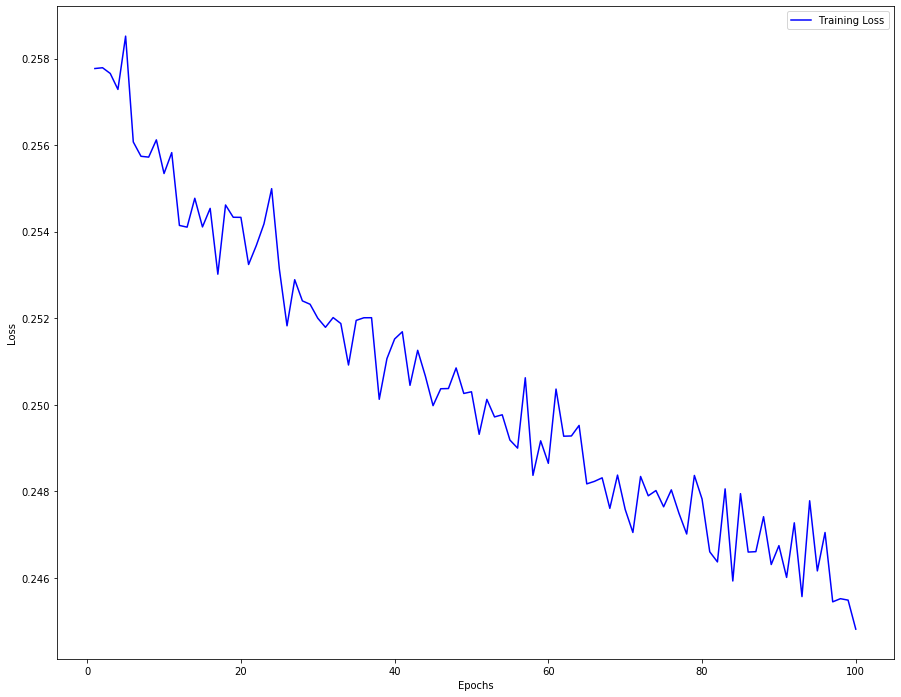

In [43]:
history_dict = model.history

acc = history_dict.history["accuracy"]
loss = history_dict.history["loss"]

epochs = range(1, len(acc)+1)

plt.figure(figsize=(15,12))
plt.plot(epochs, loss, "b", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 8. Evaluate the result

In [44]:
results = model.evaluate(x_test, y_test)

292/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [45]:
print("Evaluation Accuracy",  results[1])
print("Evaluation Loss",  results[0])

Evaluation Accuracy 0.9109589
Evaluation Loss 0.21632875604172275


In [46]:
predictions = model.predict(x_test)

In [72]:
y_test[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [71]:
predictions[:10]

array([[0.06177929],
       [0.99601614],
       [0.13000011],
       [0.8300701 ],
       [0.9917234 ],
       [0.0708088 ],
       [0.74125016],
       [0.87686217],
       [0.07080126],
       [0.07913557]], dtype=float32)

As you can se the model is ok att doing the predictions. It has failed 2 times in the first 10 elements, but still has a evaluated accuracy of 0.91 which i think is acceptable